In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('preprocessing_data.csv')

- 데이터 시각화 : 데이터 타입에 따라 시각화 기법이 달라짐
    - 단일 변수 시각화 
        - 연속형(숫자) : 데이터 분포 + 기술통계량 (Histogram + KDE Kernel desity Estimator(확률밀도함수))
                       : sns.histplot(data= , x= , kde=True)
                       : 상자 그림 (Box plot) 
                       : sns.boxplot(data= , x= ) 
                       : sns.pairplot(data= )
        - 범주형(문자) : 데이터의 빈도수 
                       : sns.countplot(data=, x= )        
    - 다변수 시각화 
        - X : 범주형 / Y : 연속형 -> 집단 간 통계량 비교 
            ( sns.barplot() / sns.boxplot() )
        - X : 연속형 / Y : 연속형 -> 두 데이터 간 연관성  
            ( sns.scatterplot() -> 회귀 선  )
        - X : 순서형(시간) / Y : 연속형 
            ( sns.lineplot() ) 

In [3]:
df1['Target']

0       96
1      102
2       95
3      117
4      143
      ... 
747     84
748    105
749     78
750     42
751     84
Name: Target, Length: 752, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='Count'>

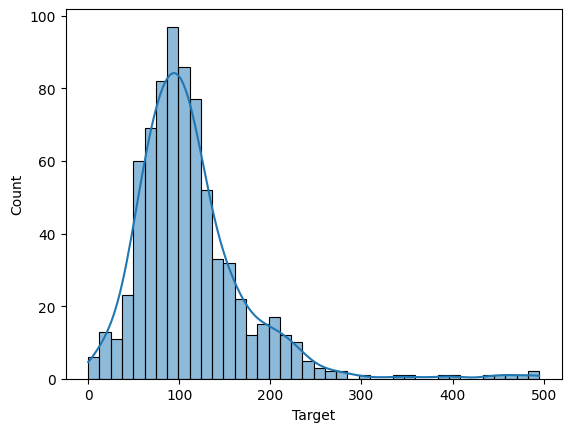

In [4]:
sns.histplot(df1, x='Target', kde=True)

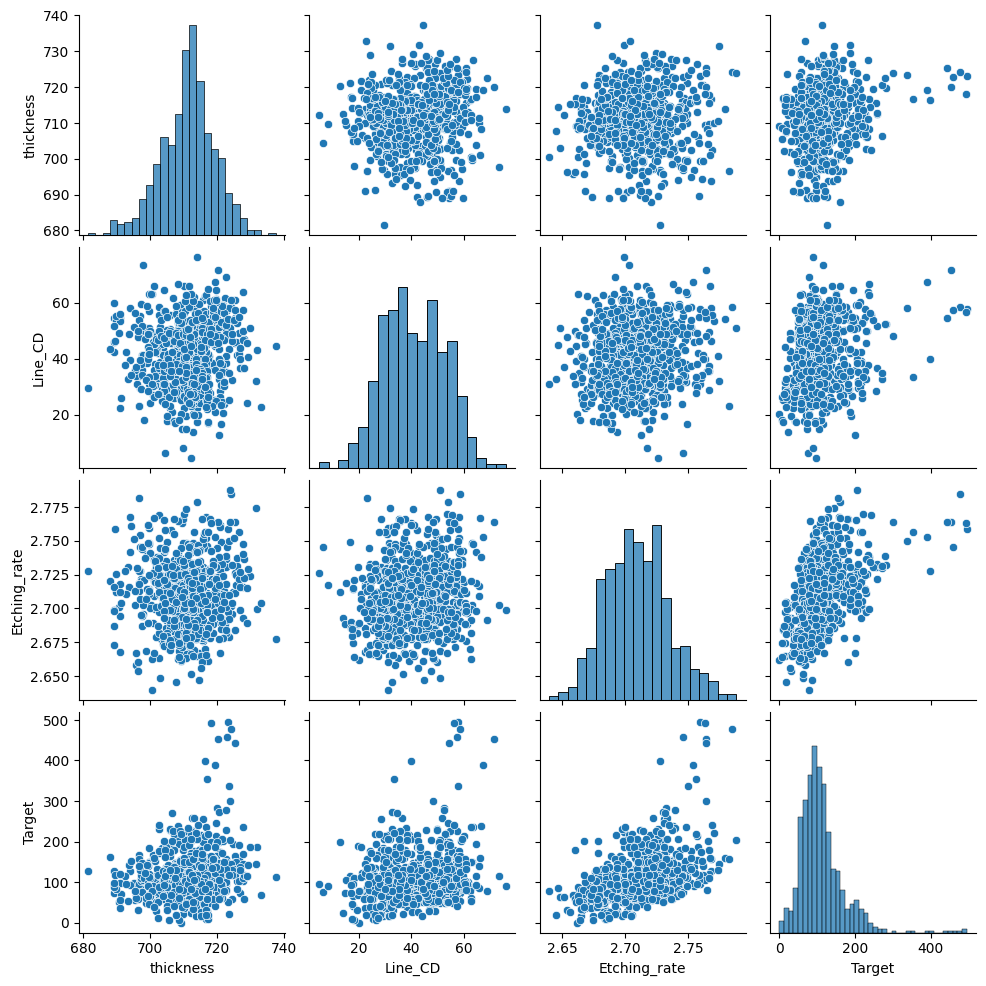

In [5]:
# 중요한 애들만 pairplot 그려보자
df2 = df1[['thickness','Line_CD','Etching_rate','Target']]
sns.pairplot(data=df2)

<AxesSubplot:xlabel='Target'>

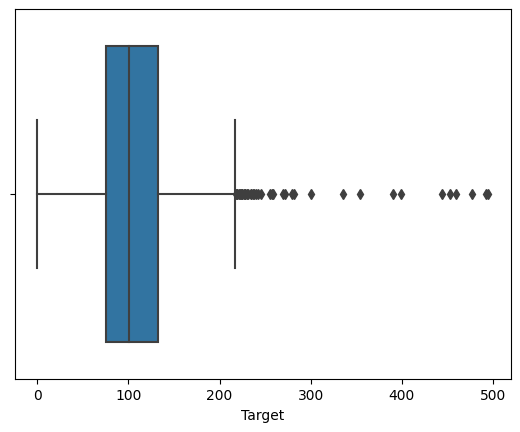

In [6]:
sns.boxplot(df1, x='Target')

<AxesSubplot:xlabel='count', ylabel='Error_message'>

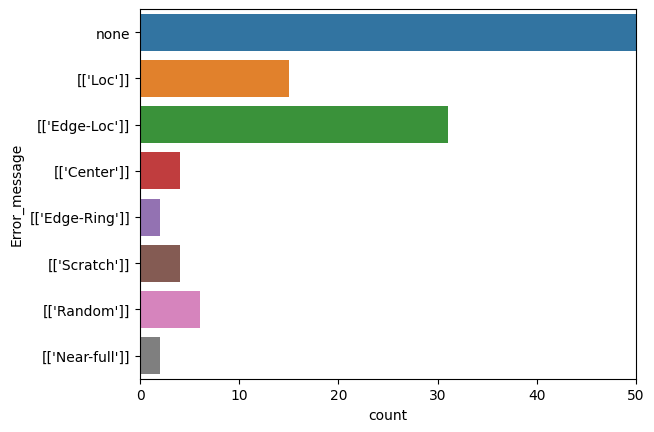

In [7]:
# x축에 그리면 글자가 잘리니까 y축으로 설정하면 보기 편해짐.
# 웨이퍼 자체에 문제가 있는 경우 에러메세지 발생함
# none을 제외하면 너무 적어 시각화에서 경향성이 잘 드러나지 않으니 x축에 제한을 걸어보자.
plt.xlim([0,50])
sns.countplot(df1, y='Error_message')

In [8]:
# 분석계획에서 봤던대로 보강여부에 따라 Time에 유의미한 차이가 있는지 확인해보자
df_oxid = df1[['Oxid_time','Reinforcement','thickness']]
df_oxid.pivot_table(index='Reinforcement', values='Oxid_time')

,Oxid_time
Reinforcement,
False,124.600587
True,112.042254


<AxesSubplot:xlabel='Reinforcement', ylabel='Oxid_time'>

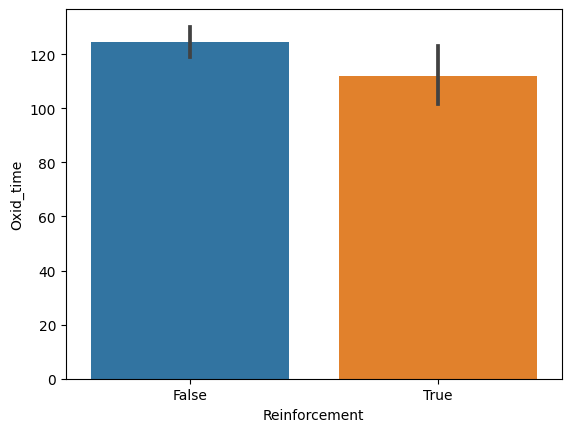

In [9]:
# 그냥 눈으로 보기에 차이가 있다고 해서 단정하면 안됨.
# 통계적 가설 검정에 따라서 판단을 해야 함.
sns.barplot(df_oxid, x='Reinforcement', y='Oxid_time')

c:\users\user.desktop-ff36f8g\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


<AxesSubplot:xlabel='Reinforcement', ylabel='Target'>

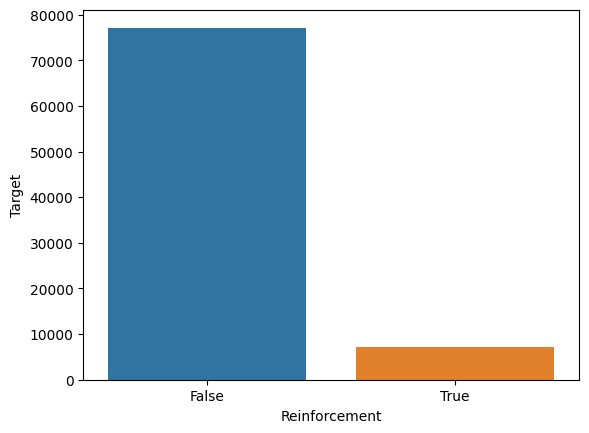

In [10]:
# 평균이 아니라 합 그래프를 그려보자.
sns.barplot(df1,x='Reinforcement',y='Target',estimator=sum, ci=None)

<AxesSubplot:xlabel='Reinforcement', ylabel='Oxid_time'>

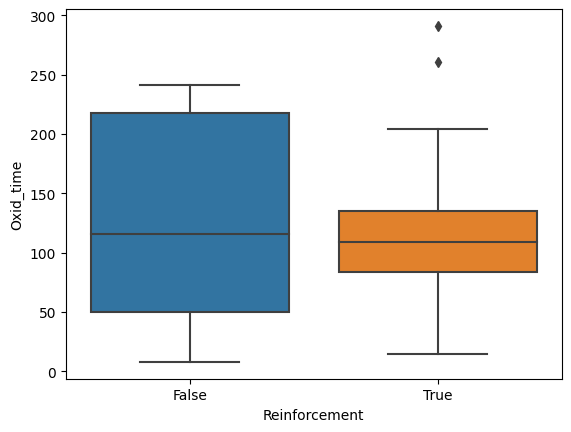

In [11]:
sns.boxplot(df_oxid, x='Reinforcement', y='Oxid_time')

In [12]:
# 연속형 - 연속형
df1[['Etching_rate','Target']]

,Etching_rate,Target
0,2.75950,96
1,2.72775,102
2,2.67000,95
3,2.74825,117
4,2.74625,143
...,...,...
747,2.67450,84
748,2.72725,105
749,2.72275,78
750,2.69150,42


<AxesSubplot:xlabel='Etching_rate', ylabel='Target'>

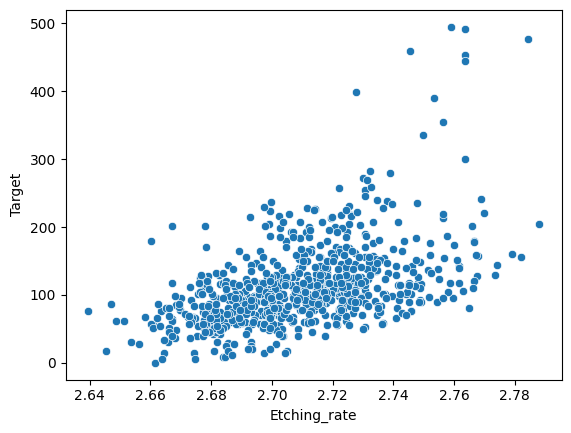

In [13]:
sns.scatterplot(df2,x='Etching_rate',y='Target')

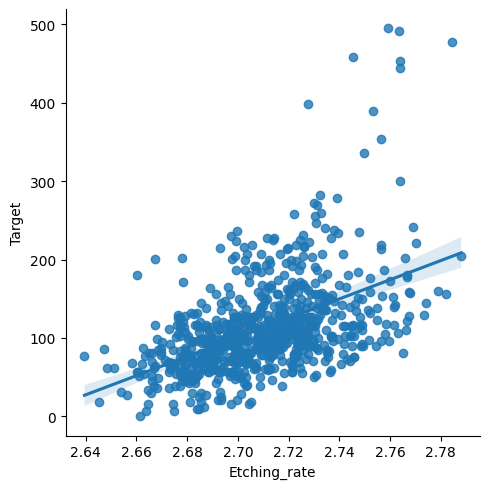

In [14]:
#회귀선 같이 그려주기
sns.lmplot(df2,x='Etching_rate',y='Target')

In [15]:
df2.corr()

,thickness,Line_CD,Etching_rate,Target
thickness,1.000000,0.058404,0.012532,0.191033
Line_CD,0.058404,1.000000,0.157237,0.230185
Etching_rate,0.012532,0.157237,1.000000,0.498164
Target,0.191033,0.230185,0.498164,1.000000


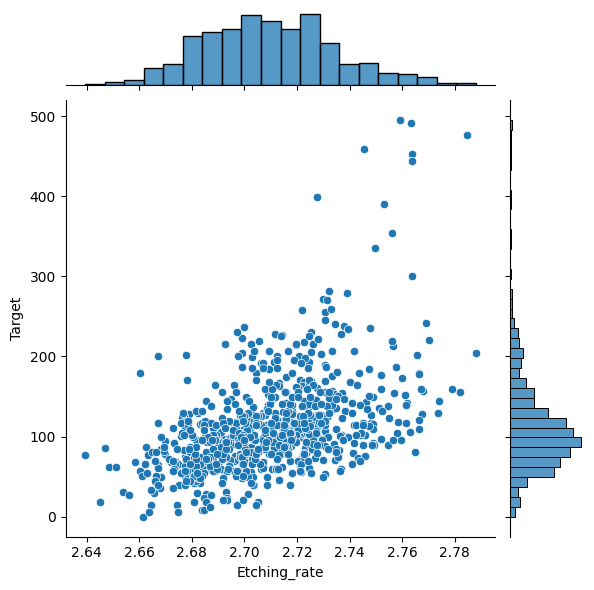

In [16]:
#산점도와 분포 같이 확인하기
sns.jointplot(df2,x='Etching_rate',y='Target')

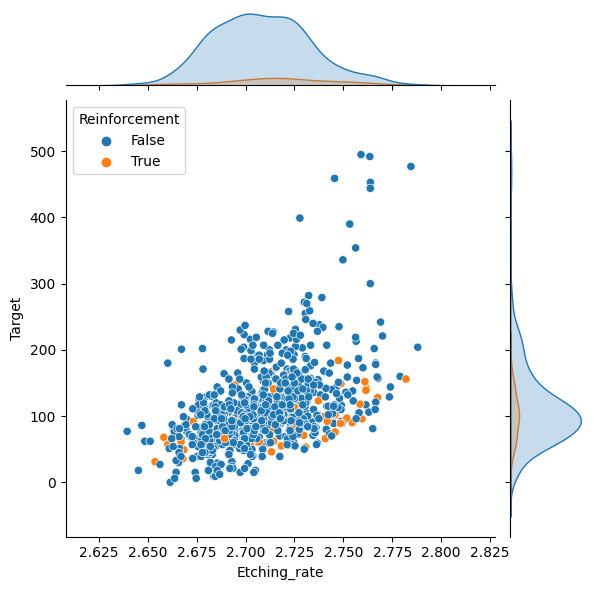

In [17]:
# 보강 여부에 따라서 색 다르게 칠하기
sns.jointplot(data=df1, x='Etching_rate',y='Target', hue='Reinforcement')

<AxesSubplot:xlabel='Ox_Chamber', ylabel='Target'>

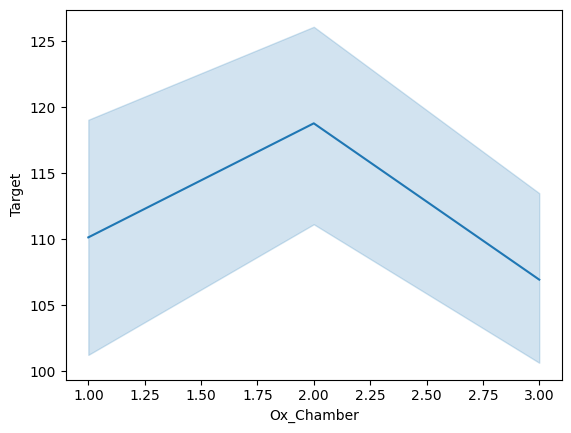

In [18]:
# 우리 데이터에는 서열척도(순서)가 없으니 임의로 Ox_chamber로 그려봤다.
# 실습용으로서 분석적 의미는 없다
sns.lineplot(data=df1, x='Ox_Chamber', y='Target')